# One dimension discrepancy model

## First approach: iterative sampling

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

Module `rain.one_dimension` is for random sampling on interval [0, 1]:

In [81]:
import rain.one_dimension as r1d

## Preliminaries 

`unif_pieces` function defines a probability density function on interval [0, 1] made of union of smaller sub-intervals given their centers and a unique radius.  
Examples: 
- `unif_pieces(x, centroids=[0.5], r=0.2)` define a uniform density on interval [0.3, 0.7] (centered on 0.5, with radius 0.2)
- `plot_density(density, size)` plots the **unormalized** given density.

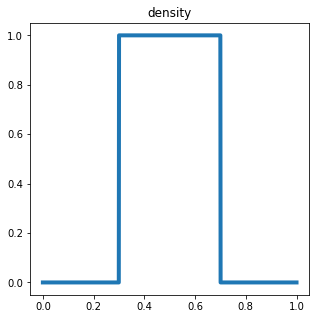

In [90]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.5], r=0.2), size=5)

Example with two non overlaped intervals:

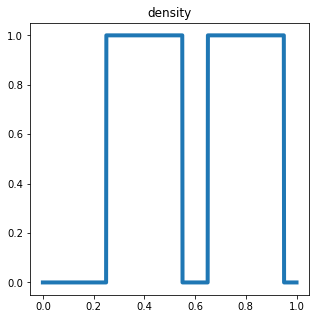

In [56]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.4, 0.8], r=0.15), size=5)

Example with two overlaped intervals:

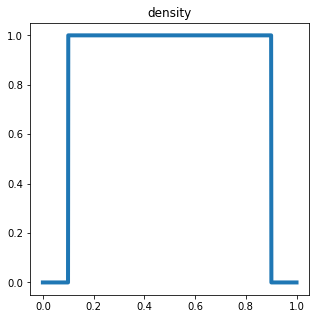

In [57]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.4, 0.6], r=0.3), size=5)

Similarly, `density_drops` defines the probability density for next drop sampling given previous drops (centroids) on interval [0, 1]. Parameter `fill` is the fraction of interval [0, 1] correponding to zero density, i.e. where no drops can go.  
Note that in comparison to `unif_pieces`, the past drops (centroids) correspond to regions where probability is zero.  
Examples:  
One past drop on 0.5, covering 70% of the interval:

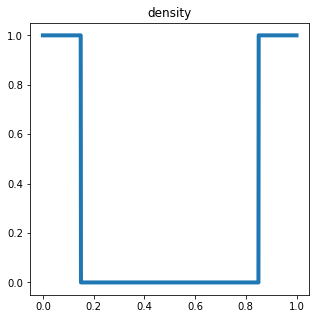

In [58]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.5], fill=0.7), size=5)

Two past drops on 0.4 and 0.8, covering 50% of the interval:

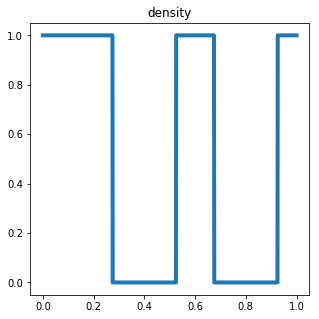

In [59]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.4, 0.8], fill=0.5), size=5)

## Dropping drops
The first drop is sampled from uniform distribution on interval [0, 1]. We then iteratively sample a new drop given the resulting distribution

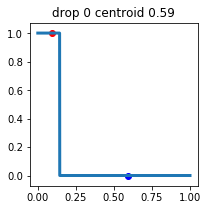

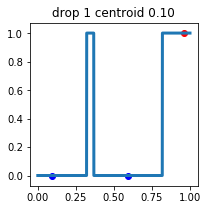

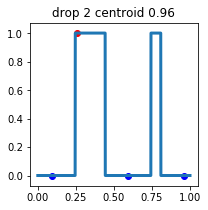

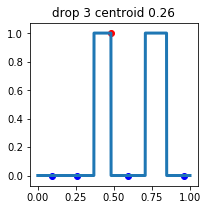

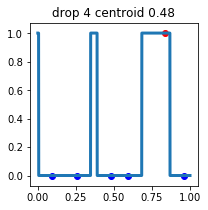

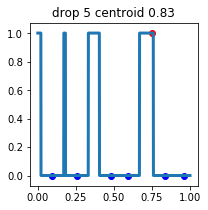

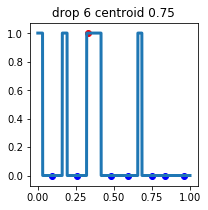

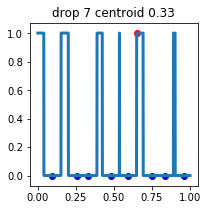

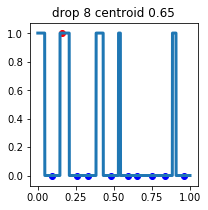

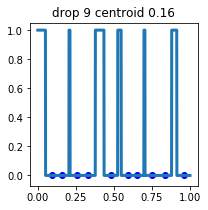

In [66]:
nb_drops = 10
fill = 0.9
centers = []
drop = np.random.sample()
for i in range(nb_drops):
    centers.append(drop)
    #print('drop', i, "centroid=", drop)
    #print("centers=", centers)
    density = lambda x: r1d.density_drops(x, centers, fill=fill)
    if i > 0:
        plt.scatter(x=[drop], y=[1], color='r')
    r1d.plot_density(density, size=3, linewidth=3, title="drop %d centroid %.2f" % (i, drop))
    plt.scatter(x=centers, y=[0]*len(centers), color='b')
    drop = r1d.rejection_sampling(density)

### Final result

Upper part: simulated non independent drops  
Lower part: independent uniformly sampled drops on the same interval

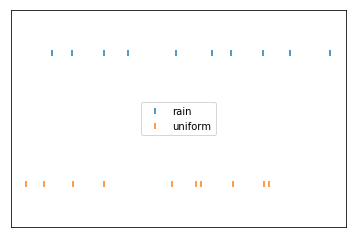

In [82]:
plt.scatter(centers, 0.8 * np.ones(nb_drops), marker='|', label='rain')
plt.scatter(np.random.sample(nb_drops), 0.2 * np.ones(len(centers)), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

### Bigger sample

In [135]:
drops = r1d.rain(66, constraint=0.7)

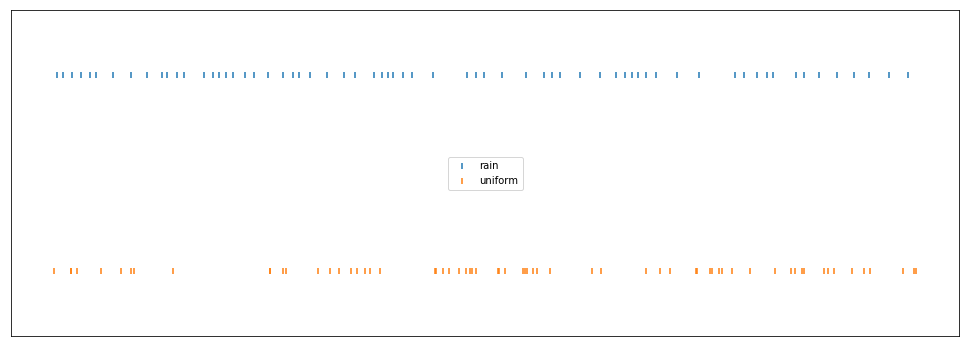

In [136]:
nb_drops = len(drops)
plt.figure(figsize=(17, 6))
plt.scatter(drops, 0.8 * np.ones(nb_drops), marker='|', label='rain')
plt.scatter(np.random.sample(nb_drops), 0.2 * np.ones(nb_drops), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

## Second approach: sampling $n$ drops in one-shot

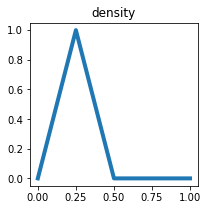

In [59]:
r1d.plot_density(lambda x: r1d.triangle_density(x, 0.25))

In [62]:
uniform_rain = np.random.sample(n)
initial = uniform_rain[0]
drops = r1d.rain2(n, initial)

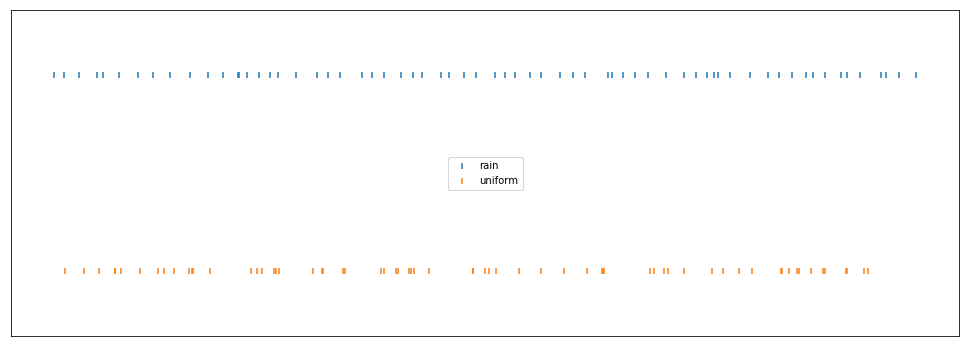

In [63]:
plt.figure(figsize=(17, 6))
plt.scatter(drops, 0.8 * np.ones(n), marker='|', label='rain')
plt.scatter(uniform_rain, 0.2 * np.ones(n), marker='|', label='uniform')
plt.ylim(ymin=0.0, ymax=1.0)
plt.legend(loc='center')
#plt.axis('off');
plt.xticks([])
plt.yticks([]);

# 2d raining model

The following approach does not work, because xs and ys shouldn't be independent.

In [96]:
# nb of drops
n = 200
unif_xs = np.random.sample(n)
unif_ys = np.random.sample(n)
init_x = unif_xs[0]
init_y = unif_ys[0]
rain_xs = r1d.rain2(n, initial=init_x)
rain_ys = r1d.rain2(n, initial=init_y)

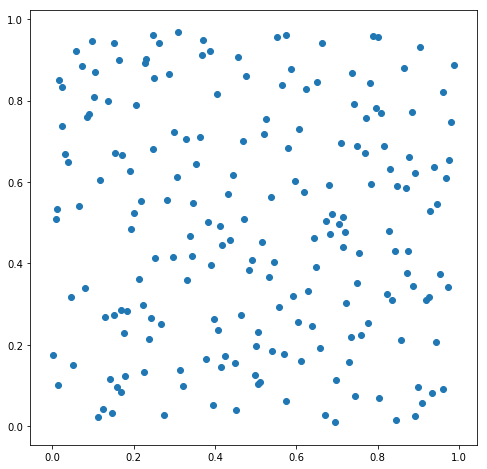

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(rain_xs, rain_ys, marker='o');

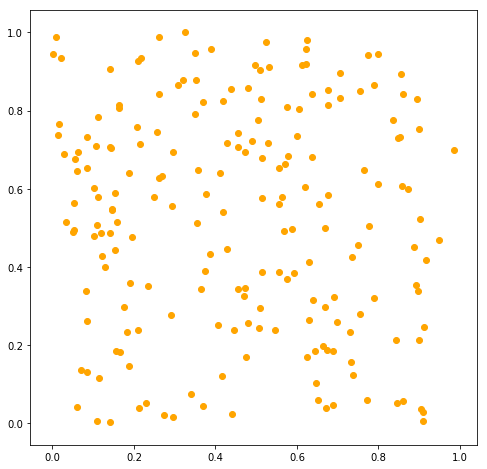

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(unif_xs, unif_ys, marker='o', color='orange');

In [109]:
import matplotlib.animation as animation
from IPython.display import HTML

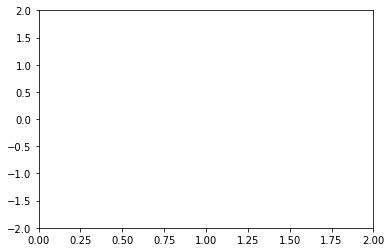

In [110]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [111]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [112]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [113]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [114]:
HTML(anim.to_html5_video())

In [15]:
print(matplotlib.animation.writers.list())

['imagemagick', 'imagemagick_file']


In [99]:
%pwd

'/Users/ivan/Documents/discrepancy/discrepancy_repo'